Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import precision_score,\
recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 

Loading the dataset into a dataframe for exploration

In [4]:
df = pd.read_csv('Fraud Detection Dataset.csv')

Firstly to get a summarised outlook of the dataset

In [36]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Transaction ID                     6000000 non-null  int64  
 1   User ID                            6000000 non-null  int64  
 2   Transaction Amount                 6000000 non-null  float64
 3   Transaction Date and Time          6000000 non-null  object 
 4   Merchant ID                        6000000 non-null  int64  
 5   Payment Method                     6000000 non-null  object 
 6   Country Code                       6000000 non-null  object 
 7   Transaction Type                   6000000 non-null  object 
 8   Device Type                        6000000 non-null  object 
 9   IP Address                         6000000 non-null  object 
 10  Browser Type                       6000000 non-null  object 
 11  Operating System        

There are 6 million entries or row in this dataset and 32 columns with no null or nan entries

Checking for duplicated rows

In [37]:
df.duplicated().sum()

0

There are no duplicated rows

Now to look at the first few rows of the dataframe , to have an idea of what the data entries look like 

In [24]:
pd.set_option('display.max_columns', None)

In [67]:
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Transaction Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,Links,Tizen,Industrial & Scientific,68,Doctor,66826.21,Prefer Not to Say,Pro,In Transit,9.34,24.22,Daytime,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,Beaker,Windows Server,Beauty & Cosmetics,22,Chemist,89356.71,Genderqueer,Pending Approval,Resolved,65.28,55.11,Daytime,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,Opera,Android,Real Estate,71,Nurse,58438.63,Male,Pro,Posted,44.05,53.84,Daytime,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,Konqueror,CentOS,Appliances,78,Nurse,3426.92,Agender,Premium,Closed,21.70,21.62,Daytime,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,Basilisk,Ubuntu,Jewelry,31,Physicist,53080.12,Male,Free,Refunded,56.63,53.71,Daytime,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


Removing some columns that may lead to data leakage and columns that won't contribute to our prediction , like IDs , Date and Time e.t.c. 

In [56]:
# Columns to drop
col_to_drop = ['Transaction ID','User ID','Transaction Date and Time',"Merchant ID"
               ,'Country Code','IP Address','Transaction Status',"User's Device Location",]

df1 = df.drop(col_to_drop, axis=1)

In [57]:
df2 = df1.copy()
#cat_var = []
for i, j in enumerate(df2.dtypes):
    if j == 'object':
        #cat_var.append(df2.dtypes.index[i])
        df2[df2.dtypes.index[i]] = pd.Categorical(df2[df2.dtypes.index[i]])

print(df2.dtypes)


Transaction Amount                    float64
Payment Method                       category
Transaction Type                     category
Device Type                          category
Browser Type                         category
Operating System                     category
Merchant Category                    category
User Age                                int64
User Occupation                      category
User Income                           float64
User Gender                          category
User Account Status                  category
Location Distance                     float64
Time Taken for Transaction            float64
Transaction Time of Day              category
User's Transaction History              int64
Merchant's Reputation Score           float64
Transaction Currency                 category
Transaction Purpose                  category
User's Credit Score                     int64
User's Email Domain                  category
Merchant's Business Age           

In [59]:
df2.describe()

,Transaction Amount,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.005515e+02,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.884166e+02,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000000e+00,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,2.507900e+02,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.005100e+02,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.504400e+02,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,1.000000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


In [60]:
sum(df2.dtypes == 'category')

14

In [61]:
df2.shape

(6000000, 24)

In [63]:
df2['Fraudulent Flag'].value_counts()

0    3000094
1    2999906
Name: Fraudulent Flag, dtype: int64

Checking the data distribution of the numeric variables

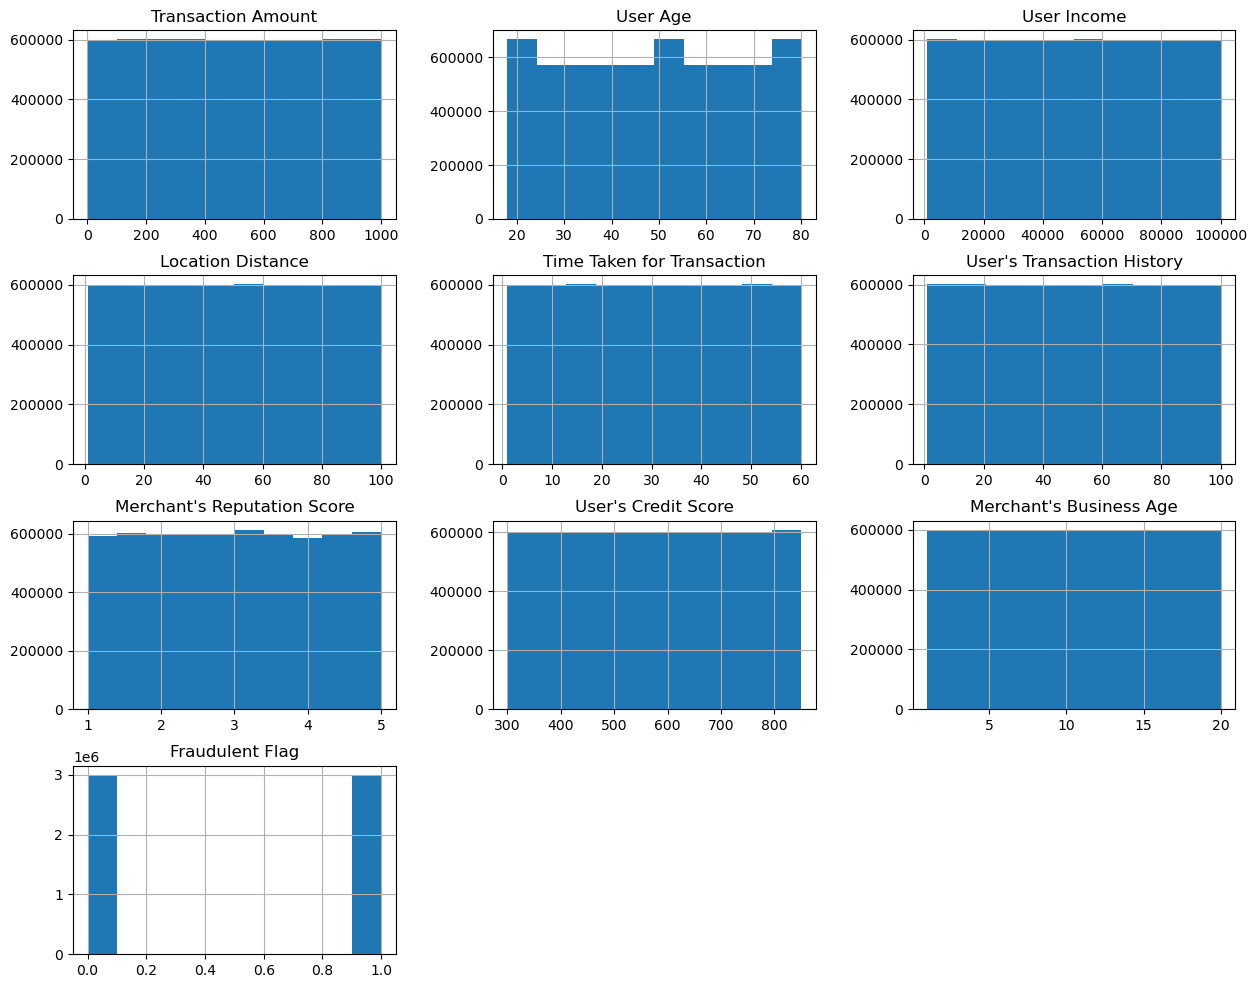

In [64]:
df2.hist(figsize=(15,12));

As highlighted by the plot above there is no class imbalance in this dataset

In [68]:
df3 = df2.copy()

Model Creation

In [69]:
# importing all the needed sklearn functions
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

Data Preprocessing

In [72]:
# Using Label encoder to turn all category data into numbers 
for i, j in enumerate(df3.dtypes):
    le = LabelEncoder()
    if j == 'category':
        df3[df3.dtypes.index[i]] = le.fit_transform(np.array(df3[df3.dtypes.index[i]].values))

In [73]:
df3.head()

,Transaction Amount,Payment Method,Transaction Type,Device Type,Browser Type,Operating System,Merchant Category,User Age,User Occupation,User Income,User Gender,User Account Status,Location Distance,Time Taken for Transaction,Transaction Time of Day,User's Transaction History,Merchant's Reputation Score,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,163.08,1,6,10,15,27,22,68,7,66826.21,6,11,9.34,24.22,0,26,2.71,24,9,343,3,3,5,0
1,430.74,0,5,18,2,33,4,22,5,89356.71,2,9,65.28,55.11,0,60,3.95,11,6,688,10,13,18,1
2,415.74,20,29,34,21,1,29,71,16,58438.63,3,11,44.05,53.84,0,81,3.81,22,0,371,27,7,33,1
3,565.89,10,22,16,14,6,0,78,16,3426.92,0,10,21.70,21.62,0,18,2.67,6,20,687,24,15,32,1
4,955.49,39,0,27,1,28,23,31,17,53080.12,3,3,56.63,53.71,0,98,3.19,31,11,605,20,17,21,1


Splitting the dataframe into features and targets

In [76]:
df3.shape

(6000000, 24)

In [74]:
# Features represented as X
X = df3[df3.columns[:-1]]

# Target represented as Y
Y = df3[df3.columns[-1]]

In [77]:
X.shape

(6000000, 23)

In [79]:
Y.head()

0    0
1    1
2    1
3    1
4    1
Name: Fraudulent Flag, dtype: int64

In [80]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

### Decision Tree Model

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
tree = DecisionTreeClassifier()
# Training the model 
tree.fit(train_set, y_train)
y_pred = tree.predict(test_set)

Evaluating the model

In [107]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test,y_pred,average="weighted"))  
print('Recall:', recall_score(y_test,y_pred, average="weighted"))
print('F1 score:', f1_score(y_test, y_pred,
                            average="weighted"))
print(roc_auc_score(y_test, y_pred))

Accuracy: 0.49949166666666667
Precision: 0.499492024814744
Recall: 0.49949166666666667
F1 score: 0.4994917804058401
0.49949153416831926


### Gradient Boosting 

In [83]:
# Creating an instance of the gradient boasting classifier and fitting it with the data to
#select the features with the most importance 
clf = GradientBoostingClassifier(random_state=0)
gbc = clf.fit(X_train, y_train)
feat_imps = pd.Series(gbc.feature_importances_, index=X_train.columns)
# Sorting the features by feature importance
sorted_feat_imp = feat_imps.sort_values(ascending  = False)
# Selecting the top 7 features
top_features = sorted_feat_imp.iloc[:7]

In [90]:
top15feat = sorted_feat_imp.iloc[:15]
# Creating new train and test dataframe with only these top seven features
train_set = X_train[top15feat.index]
test_set = X_test[top15feat.index


In [91]:
# Splitting the train set into training and testing data for training the dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [92]:
# Importing packages necessary to evaluate the model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [93]:
# Specifying the list of hyperparameters to fit the model with in order to find the best combination 
grid_values = {'n_estimators':[2,3], 'learning_rate':[0.001,0.01,0.1,1], 'max_depth':[2,3,4]}
clf1 = GridSearchCV(GradientBoostingClassifier(),param_grid = grid_values,scoring = 'roc_auc')
# Fitting the model on the datas set
clf1.fit(X_train1, y_train1)
y_dec_func = clf1.decision_function(X_test1)

In [95]:
# Getting the best combination of parameters
best_values = clf1.best_params_
# Creating the model with these parameters 
final_clf = GradientBoostingClassifier(n_estimators = best_values['n_estimators'], 
                                       learning_rate=best_values['learning_rate'], max_depth=best_values['max_depth'])
# Fitting the model with the data
final_clf.fit(train_set, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=4, n_estimators=2)

In [96]:
#Using the model to predict the values of the test data
y_pred = final_clf.predict(test_set)

Model Evaluation

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54    599406
           1       0.50      0.41      0.45    600594

    accuracy                           0.50   1200000
   macro avg       0.50      0.50      0.50   1200000
weighted avg       0.50      0.50      0.50   1200000



This model was able to do better , but still needs to be improved on.